In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATASET STRUCTURE**

In [2]:
zip_file_path = '/content/drive/My Drive/archive (4).zip'
zip_file_path = '/content/drive/MyDrive/archive (3).zip'


In [3]:
import zipfile
import os
import shutil
import random


zip_files = [
    "/content/drive/MyDrive/archive (3).zip",
    "/content/drive/MyDrive/archive (4).zip"
]


final_dataset_path = "/content/fruits_dataset"

# Temporary extraction path
temp_extract_path = "/content/temp_extracted"
if os.path.exists(temp_extract_path):
    shutil.rmtree(temp_extract_path)
os.makedirs(temp_extract_path, exist_ok=True)

# Step 1: Extract ZIP files
for zip_file_path in zip_files:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_path)

print("✅ First-level extraction completed!")


nested_zip_path = os.path.join(temp_extract_path, "archive (5).zip")
if os.path.exists(nested_zip_path):
    with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_path)

print("📂 Extracted nested archive (5).zip!")


dataset_root = None
for root, dirs, files in os.walk(temp_extract_path):
    if "Train" in dirs and "Test" in dirs and "Validation" in dirs:
        dataset_root = root
        break

if not dataset_root:
    print("❌ Could not locate dataset structure (Train/Test/Validation).")
    exit()


train_path = os.path.join(final_dataset_path, "Train")
test_path = os.path.join(final_dataset_path, "Test")
validation_path = os.path.join(final_dataset_path, "Validation")


for folder in [train_path, test_path, validation_path]:
    os.makedirs(folder, exist_ok=True)


shutil.copytree(os.path.join(dataset_root, "Train"), train_path, dirs_exist_ok=True)
shutil.copytree(os.path.join(dataset_root, "Test"), test_path, dirs_exist_ok=True)
shutil.copytree(os.path.join(dataset_root, "Validation"), validation_path, dirs_exist_ok=True)

print("📂 Copied Train, Test, and Validation folders to final dataset.")


fruit_veg_images = []
for root, dirs, files in os.walk(temp_extract_path):
    if "fruits" in root.lower() or "vegetables" in root.lower():
        for file in files:
            img_path = os.path.join(root, file)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                fruit_veg_images.append(img_path)

print(f"📸 Found {len(fruit_veg_images)} images from Fruits and Vegetables.")

# If no images found, stop execution
if not fruit_veg_images:
    print("❌ No images found in Fruits and Vegetables folders. Please check dataset structure.")
    exit()


random.shuffle(fruit_veg_images)

# Split into 70% Train, 20% Test, 10% Validation
train_split = int(0.7 * len(fruit_veg_images))
test_split = int(0.9 * len(fruit_veg_images))  # 70% Train + 20% Test


for i, img_path in enumerate(fruit_veg_images):
    if i < train_split:
        dest_folder = train_path
    elif i < test_split:
        dest_folder = test_path
    else:
        dest_folder = validation_path

    shutil.copy(img_path, os.path.join(dest_folder, os.path.basename(img_path)))

print("🎯 Images successfully distributed into Train, Test, and Validation!")


shutil.rmtree(temp_extract_path)

print("🎉 Dataset merging completed successfully!")


✅ First-level extraction completed!
📂 Extracted nested archive (5).zip!
📂 Copied Train, Test, and Validation folders to final dataset.
📸 Found 11986 images from Fruits and Vegetables.
🎯 Images successfully distributed into Train, Test, and Validation!
🎉 Dataset merging completed successfully!


In [4]:
import os

def count_images(folder):
    return sum(len(files) for _, _, files in os.walk(folder))

dataset_path = "/content/fruits_dataset"  # Update with your actual dataset path
train_count = count_images(os.path.join(dataset_path, "Train"))
test_count = count_images(os.path.join(dataset_path, "Test"))
validation_count = count_images(os.path.join(dataset_path, "Validation"))

total_fruits_vegetables = 11986  # Replace with the actual number of images from Fruits and Vegetables

print(f"📂 Train: {train_count} images")
print(f"📂 Test: {test_count} images")
print(f"📂 Validation: {validation_count} images")
print(f"📸 Total distributed: {train_count + test_count + validation_count}")



📂 Train: 16762 images
📂 Test: 4782 images
📂 Validation: 2391 images
📸 Total distributed: 23935


In [5]:
import os

fruits_path = "/content/fruits_dataset/Fruits"
vegetables_path = "/content/fruits_dataset/Vegetables"

def count_remaining_images(folder):
    if os.path.exists(folder):
        return sum(len(files) for _, _, files in os.walk(folder))
    return 0  # If folder doesn't exist

remaining_fruits = count_remaining_images(fruits_path)
remaining_vegetables = count_remaining_images(vegetables_path)

print(f"🍏 Remaining Fruits images: {remaining_fruits}")
print(f"🥦 Remaining Vegetables images: {remaining_vegetables}")
print(f"📸 Total remaining: {remaining_fruits + remaining_vegetables}")


🍏 Remaining Fruits images: 0
🥦 Remaining Vegetables images: 0
📸 Total remaining: 0


In [6]:
import os

dataset_path = "/content/fruits_dataset"

def count_images(folder):
    return sum(len(files) for _, _, files in os.walk(folder))

train_count = count_images(os.path.join(dataset_path, "Train"))
test_count = count_images(os.path.join(dataset_path, "Test"))
validation_count = count_images(os.path.join(dataset_path, "Validation"))

total_count = train_count + test_count + validation_count

print(f"📂 Train: {train_count} images")
print(f"📂 Test: {test_count} images")
print(f"📂 Validation: {validation_count} images")
print(f"📸 Total images in dataset: {total_count}")

expected_total = 11986  # Expected images from Fruits & Vegetables (adjust if needed)
original_dataset_images = total_count - expected_total  # Existing dataset images

print(f"📸 Expected Fruits & Vegetables: {expected_total}")
print(f"📂 Original dataset images: {original_dataset_images}")
print(f"✅ Final verification completed!")


📂 Train: 16762 images
📂 Test: 4782 images
📂 Validation: 2391 images
📸 Total images in dataset: 23935
📸 Expected Fruits & Vegetables: 11986
📂 Original dataset images: 11949
✅ Final verification completed!


**CONVOLUTIONAL NEURAL NETWORK(CNN)**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

# ✅ Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased shift range
    height_shift_range=0.3,  # Increased shift range
    shear_range=0.3,  # Increased shear
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.6, 1.4),  # Adjusted brightness range
    channel_shift_range=0.2,  # Increased channel shift range
    fill_mode='nearest',
    validation_split=0.2  # Split data into validation set
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load Data with Validation Split for more efficient training
train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/Train",
    target_size=(160, 160),
    batch_size=32,  # Increased batch size
    class_mode='categorical',
    subset='training'  # Use subset for training
)

validation_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/Train",
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use subset for validation
)

# ✅ Load Pre-trained MobileNetV2 Model (Frozen)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False  # Freeze base layers initially

# ✅ Custom Layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Increased neurons for more complexity
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# ✅ Define the Model
model = Model(inputs=base_model.input, outputs=output)

# ✅ Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=6, min_lr=1e-6)

# ✅ Compile Model with a slightly higher Learning Rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train the Model with more epochs
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increased epochs
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# ✅ Fine-tune the Model (Unfreeze more layers)
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Unfreeze last 50 layers
    layer.trainable = True

# ✅ Compile Again with a Smaller Learning Rate for Fine-Tuning
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Fine-Tune the Model with more epochs
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Fine-tune with more epochs
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Found 6703 images belonging to 10 classes.
Found 1669 images belonging to 10 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,589,514 (9.88 MB)

 Trainable params: 331,018 (1.26 MB)

 Non-trainable params: 2,258,496 (8.62 MB)

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 95s 401ms/step - accuracy: 0.4577 - loss: 2.1784 - val_accuracy: 0.6597 - val_loss: 1.3751 - learning_rate: 5.0000e-04
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 74s 351ms/step - accuracy: 0.7432 - loss: 1.1518 - val_accuracy: 0.7831 - val_loss: 1.0056 - learning_rate: 5.0000e-04
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 387ms/step - accuracy: 0.7872 - loss: 1.0126 - val_accuracy: 0.8029 - val_loss: 0.9508 - learning_rate: 5.0000e-04
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 388ms/step - accuracy: 0.8002 - loss: 0.9376 - val_accuracy: 0.7609 - val_loss: 0.9536 - learning_rate: 5.0000e-04
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 74s 354ms/step - accuracy: 0.8299 - loss: 0.8552 - val_accuracy: 0.8167 - val_loss: 0.8473 - learning_rate: 5.0000e-04
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.8343 - loss: 0.8209 - val_accuracy: 0.8388 - val_loss: 0.7849 - learning_rate: 5.0000e-04
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 75s 35

In [19]:
# ✅ Load Test Data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/Test",  # Ensure you have a "Test" folder
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Found 2385 images belonging to 10 classes.
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9741 - loss: 0.1895
Test Accuracy: 97.23%
Test Loss: 0.1802


**ACCURACY AND VALIDATION**

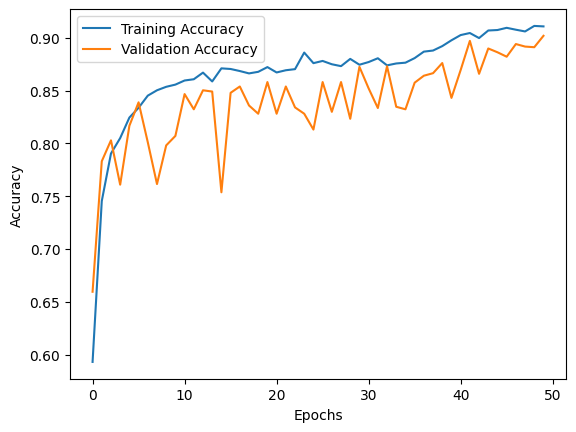

In [20]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get the predictions
y_pred = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class labels

# Get the true labels
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step
Confusion Matrix:
[[23 24 20 23 32 22 26 25 25 22]
 [25 22 21 25 22 19 25 29 27 26]
 [24 21 36 20 24 20 30 22 27 16]
 [22 23 28 26 29 22 17 26 25 24]
 [23 30 28 26 14 28 22 30 18 21]
 [20 25 26 23 25 22 29 18 19 23]
 [27 28 31 24 26 25 23 15 21 18]
 [29 23 20 34 22 17 17 26 25 25]
 [31 19 13 22 23 21 33 22 22 30]
 [26 25 24 26 24 30 16 21 25 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.10      0.09       242
           1       0.09      0.09      0.09       241
           2       0.15      0.15      0.15       240
           3       0.10      0.11      0.11       242
           4       0.06      0.06      0.06       240
           5       0.10      0.10      0.10       230
           6       0.10      0.10      0.10       238
           7       0.11      0.11      0.11       238
           8       0.09      0.09      0.09       236
           9       0.09      0.09      0.09  

In [22]:
model.save('/content/drive/MyDrive/model.keras')
